##<i class="fa fa-diamond"></i> Primero pimpea tu libreta!

In [1]:
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    base = os.getcwd()
    styles = "<style>\n%s\n</style>" % (open(os.path.join(base,'files/custom.css'),'r').read())
    return HTML(styles)
css_styling()

# Gradient Boosting Classifier (GBC)

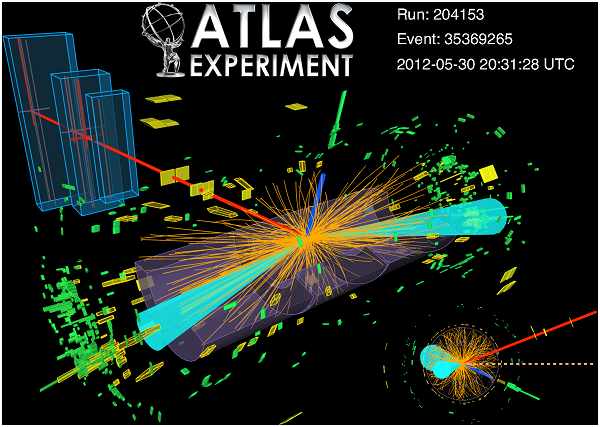

In [2]:
from IPython.core.display import Image
Image('https://kaggle2.blob.core.windows.net/competitions/kaggle/3887/media/ATLASEXP_image.png')

# Empiezo

Hola mundo

In [3]:
import numpy as np
import scipy as sc
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.cross_validation import train_test_split
import os
import pickle
import sys

## Datos de entrenamiento!

In [9]:
df=pd.read_csv('training.csv')
bueno=df['Label'].replace(to_replace=['s','b'],value=[1,0])
# quitar columnas
df.drop('EventId',axis=1,inplace=True)
df.drop('Label',axis=1,inplace=True)

## Entrenar modelo!

In [7]:
X = df.values
Y = bueno

w_train=X_train[:,-1]
X_train = X_train[:,:-1]

      Iter       Train Loss   Remaining Time 
         1           1.2137            1.22m
         2           1.1578           56.90s
         3           1.1188           51.89s
         4           1.0749           48.28s
         5           1.0401           45.97s
         6           1.0096           44.19s
         7           0.9853           42.48s
         8           0.9609           41.07s
         9           0.9384           39.67s
        10           0.9194           38.21s
        20           0.8180           27.10s
        30           0.7757           17.94s
        40           0.7548            8.79s
        50           0.7421            0.00s


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=10, max_leaf_nodes=None,
              min_samples_leaf=200, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

## Guardar tu mejor classificador

In [84]:
pickle_out = open('mejor.pkl', 'wb')
pickle.dump(clf, pickle_out)
pickle_out.close()

## Loadeando tu classificador

In [14]:
my_object_file = open('mejor.pkl', 'rb')
clf = pickle.load(my_object_file)
my_object_file.close()

## Mejorando la regla de decision
### en vez de 0.5 usaremos el percentil 88%

In [54]:
prob_pre_train=clf.predict_proba(X_train)[:,1]
prob_pre_test=clf.predict_proba(X_test)[:,1]


Look at the following two cells and you understand the concepts

In [98]:
pcut = np.percentile(prob_pre_train,88)

In [56]:
pcut

0.82254474492399354

In [57]:
Yhat_train = prob_pre_train > pcut 
Yhat_test = prob_pre_test > pcut

### The Metric 'penalizes' according to the weight that is linked with an event.

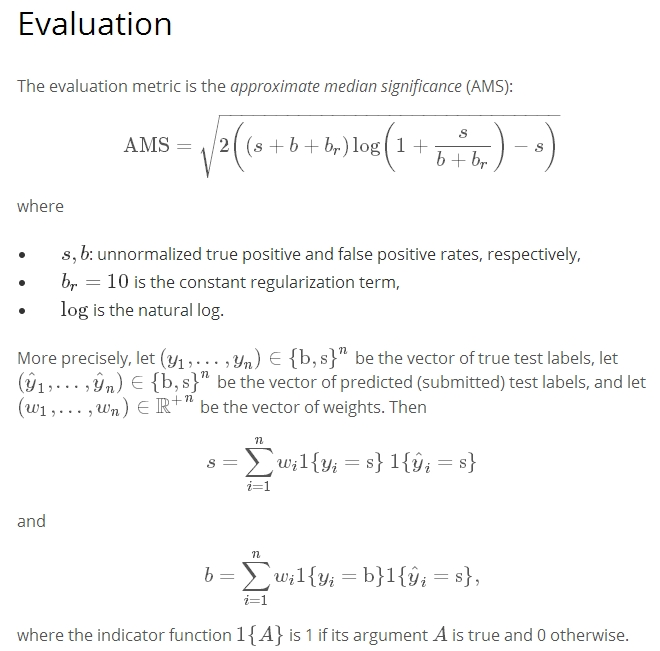

In [91]:
Image('http://i.imgur.com/Hflz2lG.jpg')

In [58]:
# razon de entrenamiento
rat =  float(X_train.shape[0]) /float(X_test.shape[0])

print(rat)

0.111111111111


In [59]:

TruePositive_train = w_train*(Y_train==1.0)*(1.0/rat)
TrueNegative_train = w_train*(Y_train==0.0)*(1.0/rat)
TruePositive_valid = w_test*(Y_test==1.0)*(1.0/(1-rat))
TrueNegative_valid = w_test*(Y_test==0.0)*(1.0/(1-rat))

In [60]:
s_train = sum ( TruePositive_train*(Yhat_train==1.0) )#here only the "cases" are summed where prediction and "real" signal come together
b_train = sum ( TrueNegative_train*(Yhat_train==1.0) )#...
s_valid = sum ( TruePositive_valid*(Yhat_test==1.0) )
b_valid = sum ( TrueNegative_valid*(Yhat_test==1.0) )

In [97]:

print('Calculando el score AMS score para una probabilidad de corte pcut=',pcut)
def AMSScore(s,b): return  math.sqrt (2.*( (s + b + 10.)*math.log(1.+s/(b+10.))-s))
print( '   - AMS basado en %s %% entrenamiento:' % (rat*100),AMSScore(s_train,b_train))
print('   - AMS basado en %s %% validacion:' % ((1-rat)*100),(AMSScore(s_valid,b_valid)))

('Calculando el score AMS score para una probabilidad de corte pcut=', 0.82254474492399354)
('   - AMS basado en 11.1111111111 % entrenamiento:', 3.762137684770048)
('   - AMS basado en 88.8888888889 % validacion:', 3.2146923823942384)


In [ ]:
df=pd.read_csv('test.csv')
